<a href="https://colab.research.google.com/github/BiancalBarreto/CP2-IA/blob/main/CP2_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
## Por aqui iremos descrever o caminho do dataset para que possamos visualizar a tabela

url = "/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv"

df = pd.read_csv(url)

df.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
## Por aqui podemos ter mais informações a respeito do Dataset e se possui dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [9]:
## Por aqui podemos observar a diferença de quantidade entre Feminino e Masculino
print(df.groupby('Gender').size())

Gender
Female    1043
Male      1068
dtype: int64


In [10]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


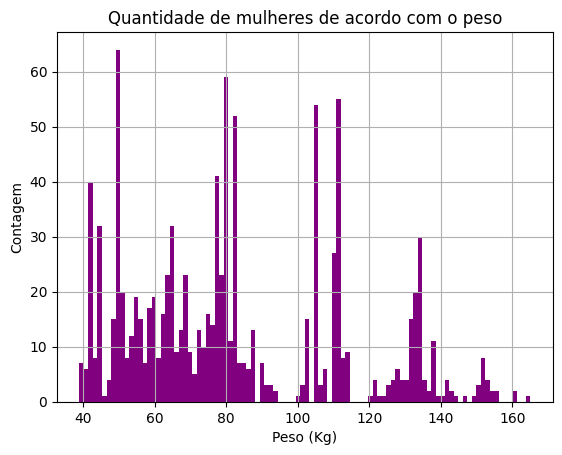

In [30]:
## Aqui podemos ver a quantidade de mulheres que possuem cada um dos pesos

female_df = df[df['Gender'] == 'Female']
plt.hist(female_df['Weight'], bins=100, color='purple')

plt.title('Quantidade de mulheres de acordo com o peso')
plt.xlabel('Peso (Kg)')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()


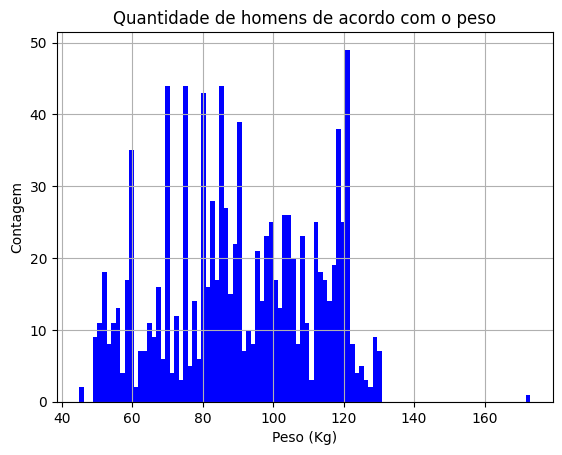

In [29]:
## Aqui podemos ver a quantidade de mulheres que possuem cada um dos pesos

male_df = df[df['Gender'] == 'Male']
plt.hist(male_df['Weight'], bins=100, color='blue')

plt.title('Quantidade de homens de acordo com o peso')
plt.xlabel('Peso (Kg)')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

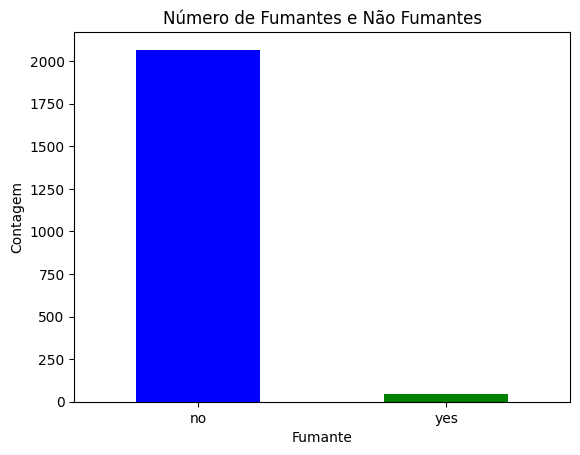

---------------------------------------------------------
Número de Fumantes: 44
Número de Não Fumantes: 2067
--------------------------------------------------------
Número de Homens que Fumam: 29
Número de Mulheres que Fumam: 15


In [26]:
# Aqui contamos o número de fumantes e não fumantes
smoker_counts = df['SMOKE'].value_counts()

# Aqui podemos criar um histograma para entender quantas pessoas fumam e quantas não fumam
smoker_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Número de Fumantes e Não Fumantes')
plt.xlabel('Fumante')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

# Aqui podemos contabilizar quantas pessoas fumam e quantas não fumam ESPECIFICAMENTE
smokers_count = df[df['SMOKE'] == 'yes'].shape[0]
non_smokers_count = df[df['SMOKE'] == 'no'].shape[0]

print('---------------------------------------------------------')
print(f"Número de Fumantes: {smokers_count}")
print(f"Número de Não Fumantes: {non_smokers_count}")



# Aqui estamos filtrando o dataframe para incluir apenas fumantes
smokers_df = df[df['SMOKE'] == 'yes']

# Contabilizando o número de homens e mulheres que fumam
male_smokers_count = smokers_df[smokers_df['Gender'] == 'Male'].shape[0]
female_smokers_count = smokers_df[smokers_df['Gender'] == 'Female'].shape[0]

print('--------------------------------------------------------')
print(f"Número de Homens que Fumam: {male_smokers_count}")
print(f"Número de Mulheres que Fumam: {female_smokers_count}")